In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import benchmark_utils as utils
import warnings
from utils import *
from matplotlib.pyplot import *
from pathlib import Path, PurePath
from nilearn import image, plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from nilearn.glm.first_level import FirstLevelModel
from load_confounds import Params9
from sklearn.model_selection import KFold
from nilearn.decoding import Decoder
from IPython.display import Markdown, display

In [2]:
subject = 'sub-01'
path = '/home/SRastegarnia/hcptrt_decoding_Shima/DATA/cneuromod/hcptrt/fmriprep-20.2lts/{}/'.format(subject)
task_dir = '/home/SRastegarnia/hcptrt_decoding_Shima/hcptrt_decoding'

# task_labels = ['wm','motor','emotion','language','gambling','social','relational']
task_labels = ['emotion','language','gambling','social','relational']
warnings.filterwarnings('ignore')

### Generating beta maps and decoding using decoder object:

**Task: emotion**

countdown 0.93
new_bloc_face 0.77
new_bloc_shape 0.84
response_face 0.94
response_shape 0.84
mean value: 0.87 



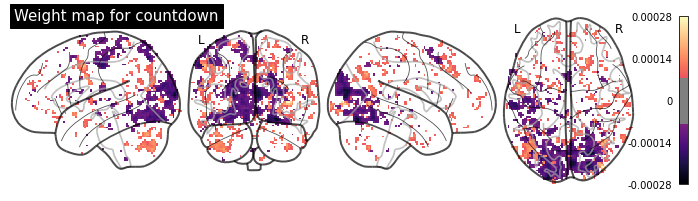

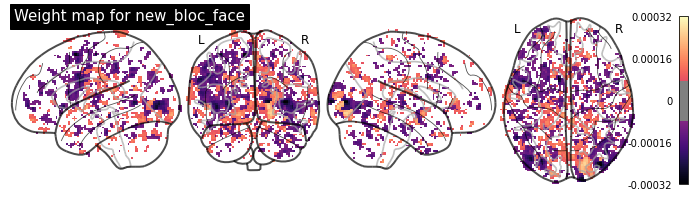

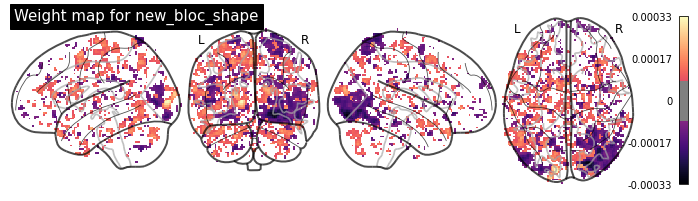

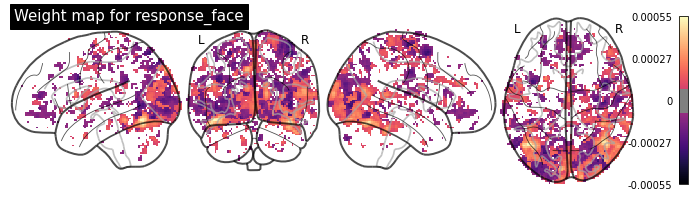

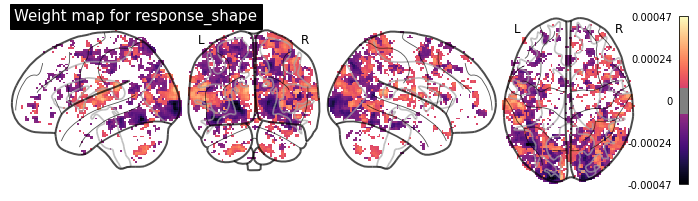

**Task: language**

presentation_math 0.98
presentation_story 0.98
question_math 0.94
question_story 0.95
response_math 0.95
response_story 0.89
mean value: 0.95 



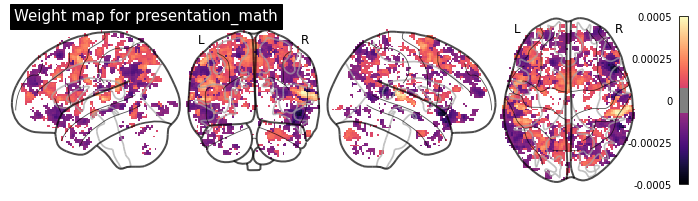

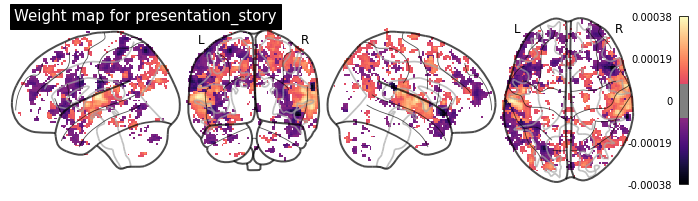

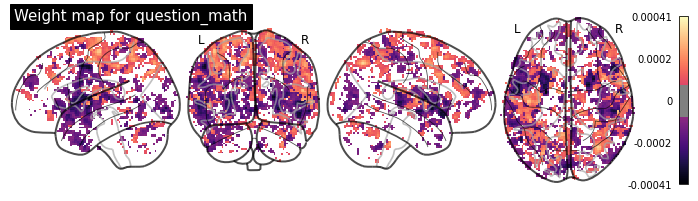

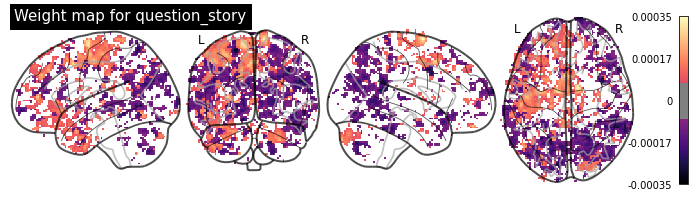

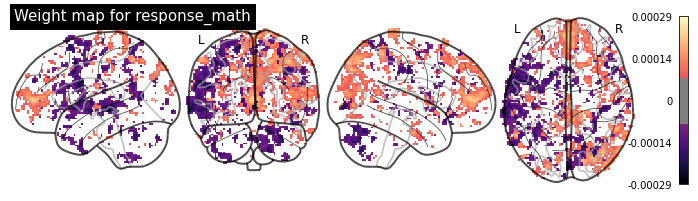

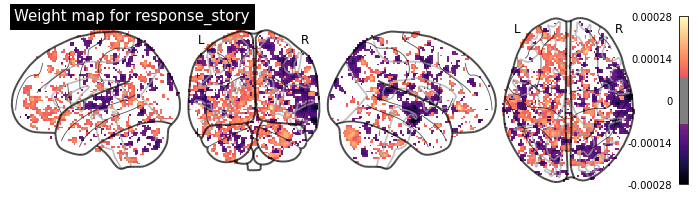

**Task: gambling**

Feedback 0.93
Neutral 0.81
Punishment 0.61
Reward 0.64
countdown 0.91
mean value: 0.78 



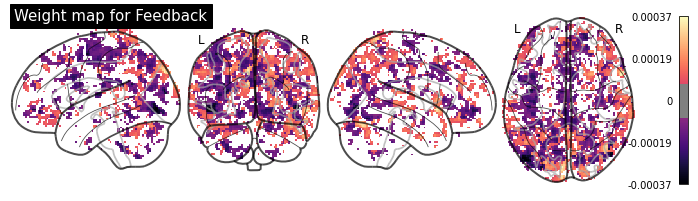

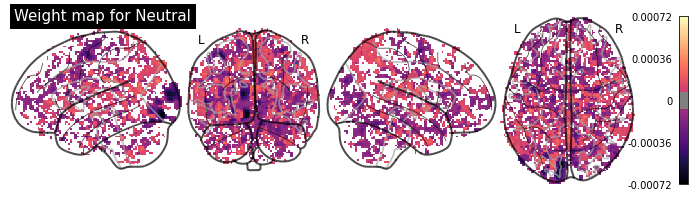

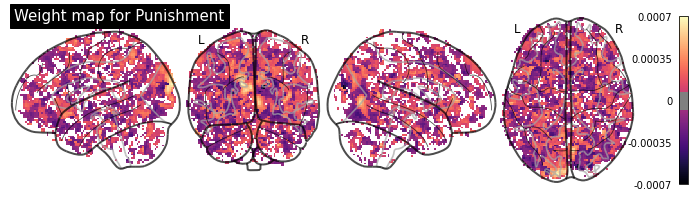

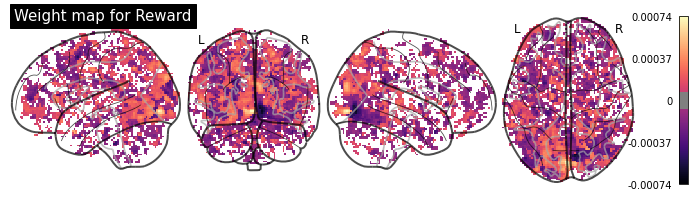

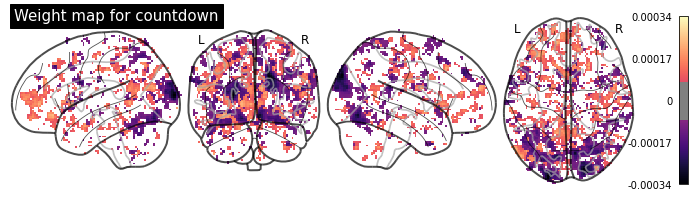

**Task: social**

countdown 0.93
mental 0.87
random 0.91
mean value: 0.9 



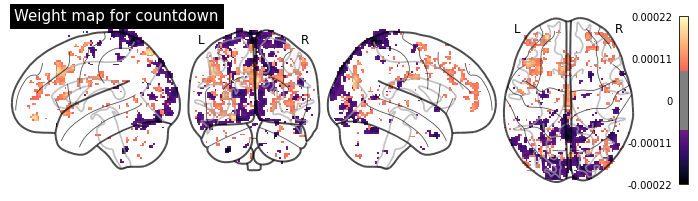

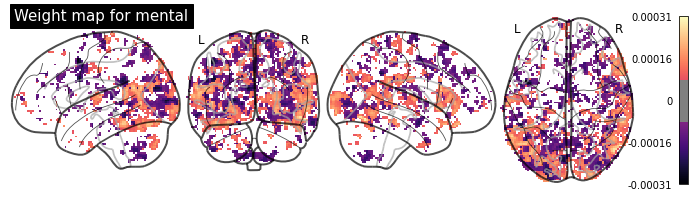

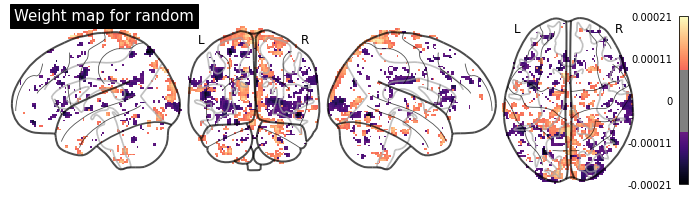

**Task: relational**

Control_Shape 0.81
Control_Texture 0.81
Relational_Shape 0.84
Relational_Texture 0.75
countdown_nan 0.99
new_bloc_control_nan 0.84
new_bloc_relational_nan 0.87
mean value: 0.84 



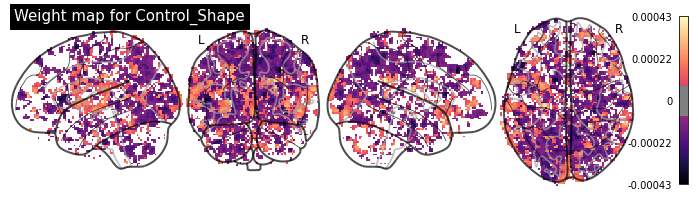

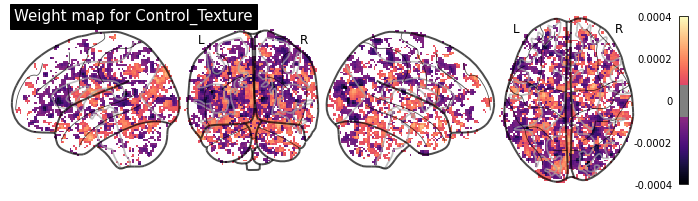

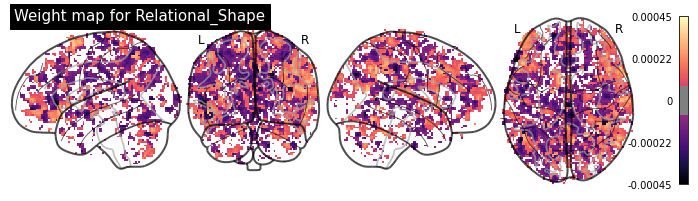

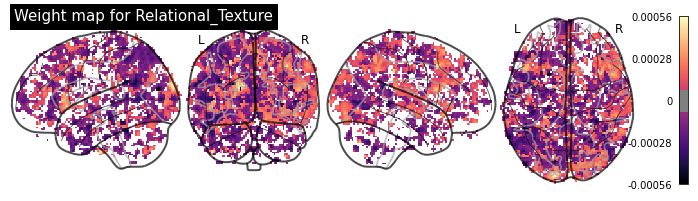

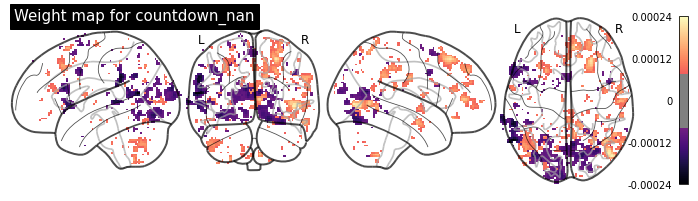

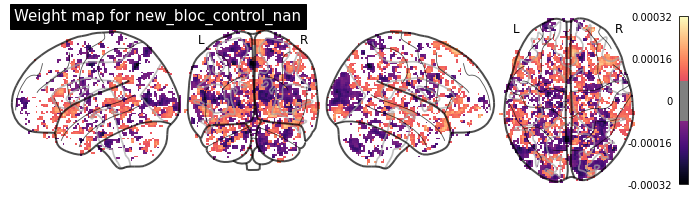

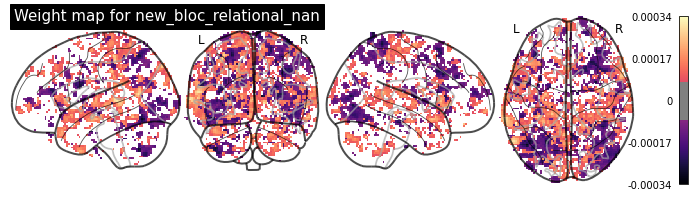

In [3]:
for task_label in task_labels:    
    
    tpl_mask= path+'{}_ses-002_task-{}_run-2_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'.format(subject,task_label)
    event_file= path+'{}_ses-002_task-{}_run-02_events.tsv'.format(subject,task_label)
    utils.printmd('**Task: {}**'.format(task_label))
    
    # Read all conditions
    df = utils.new_conditions(path,event_file,task_label)
    conditions = list(set(df.trial_type))

    # Generate beta maps
    utils.postproc_task(subject,task_label,conditions,tpl_mask)
    
    # Decoder
    utils.check_decoding(subject,task_dir, task_label,tpl_mask)